# Pymaceuticals Inc.
---

### Analysis

- The Mouse Study included 249 test mice across 10 treatments for squamous cell carcinoma (SCC). This analysis focuses more closely on 4 (Capomulin, Ramicane, Infubinol, and Ceftamin), with additional attention to Capomulin. 
- When examining the dataset, there was one instance of duplicate timepoints for Mouse ID g989, which was excluded from analysis, yielding a revised total of 248 mice. The sample was almost perfectly split with 125 Male and 123 Female mice.
- The summary statistics show Ramican and Capomulin with the lowest Mean Volume and also the lowest rates of variance among those studied, which could point to both efficacy and consistency of the treatments. 
- Capomulin and Ramicane were also the most observed with the highest total Timepoints.
- When examining final tumor volume, Capomulin and Ramicane had the lowest numbers and neither had any Mice outside of the subset's IQRs.
- Examining a single mouse (l509) treated with Capomulin over 45 days, we see tumor volume continue to grow until day 20, and then drop sharply until day 40, with another increase at the end of the trial.
- Comparing Mouse Weight to Tumor Volume shows a strong positive correlation of .84, suggesting that Volume increases proportionally to Mouse Size. 
- Overall, the study shows promise for treatment with Capomulin and Ramicane, though it would be useful to see results beyond 45 days and it could also be valuable to analyze other factors, including Mouse Age, as studies continue.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_count = mouse_study["Mouse ID"].value_counts()

mouse_count.count()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_dup = mouse_study[mouse_study[["Mouse ID", "Timepoint"]].duplicated() == True]
mouse_study_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_cut = mouse_study[mouse_study["Mouse ID"] == "g989"]
mouse_study_cut

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study[mouse_study["Mouse ID"] != "g989"]

mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = mouse_study_clean["Mouse ID"].value_counts()

mouse_count_clean.count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_mean = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_median = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_var = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_stdev = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_sem = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_regimen = pd.DataFrame({
    "Mean Tumor Volume" : tumor_mean,
    "Median Tumor Volume" : tumor_median,
    "Tumor Volume Variance" : tumor_var,
    "Tumor Volume Std. Dev." : tumor_stdev,
    "Tumor Volume Std. Err." : tumor_sem
})
drug_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
drug_regimen_agg = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

drug_regimen_agg = drug_regimen_agg.rename(columns={"mean":"Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", \
                                                    "std":"Tumor Volume Std. Dev.", "sem":"Tumor Volume Std. Err."})
drug_regimen_agg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

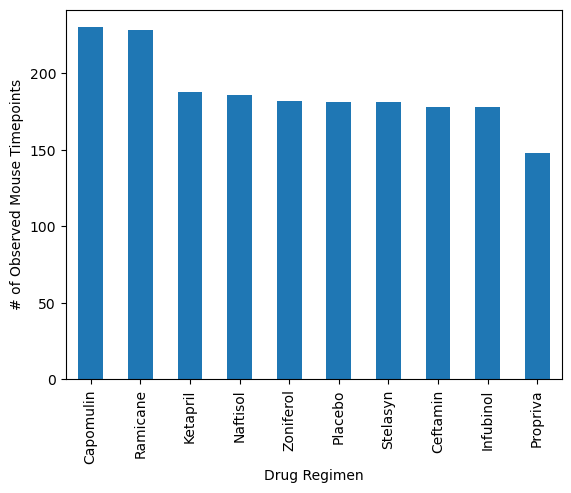

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.    
timepoint = mouse_study_clean.groupby(['Drug Regimen'])["Timepoint"].count().sort_values(ascending=False)

 # Configure plot, figsize, title, and axis labels
figure1 = timepoint.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
xticklabels = timepoint.index
figure1.set_xticklabels(xticklabels, rotation=90)

plt.show()


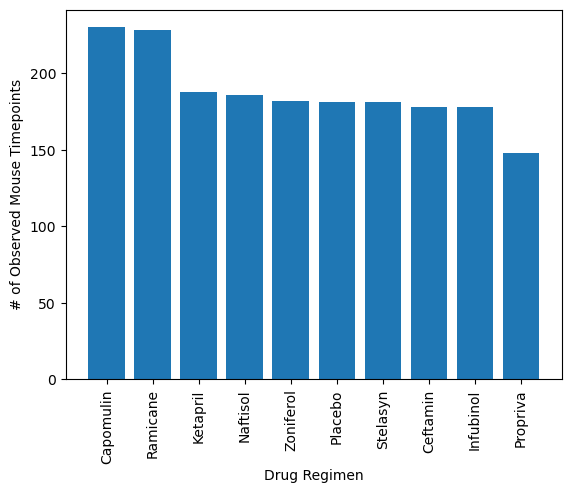

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# drug = pulled from timpoints index
drug = timepoint.index.tolist()
tick_locations = [value for value in drug]

# timepoint = pulled from previous graph
plt.bar(drug, timepoint)
plt.xticks(tick_locations, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

There are 125 male mice included in the study.
There are 123 female mice included in the study.
There are a total of 248 mice included in the study.


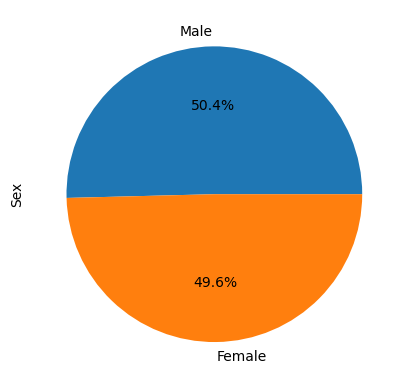

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Limit study to one timepoint pwe mouse
sex_count = mouse_study_clean.loc[:, ['Mouse ID', "Sex"]].drop_duplicates(keep= 'first')
# Count the total mice based on that
sex_total = sex_count["Mouse ID"].count()
# Get the numbers for male/female mice
male_count = (sex_count['Sex']=="Male").sum()
female_count = (sex_count['Sex']=="Female").sum()

#Pandas Pie
mouse_pie = pd.DataFrame([male_count, female_count], index=['Male', 'Female'], columns=['Sex'])
mouse_pie.plot(kind ="pie", subplots=True, autopct="%.01f%%", legend=False)

print(f'There are {male_count} male mice included in the study.')
print(f'There are {female_count} female mice included in the study.')
print(f'There are a total of {sex_total} mice included in the study.')
plt.show()

There are 125 male mice included in the study.
There are 123 female mice included in the study.
There are a total of 248 mice included in the study.


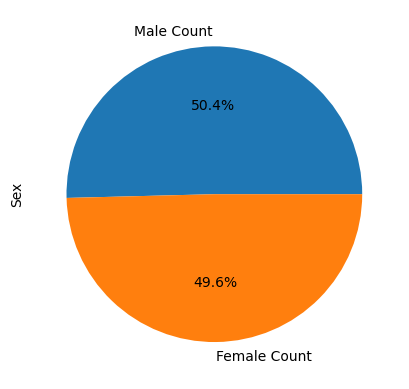

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Build array from 2 counts
y = np.array([male_count, female_count])
pie_labels = ["Male Count", "Female Count"]

plt.pie(y, labels=pie_labels, autopct='%1.1f%%')
plt.ylabel("Sex")

print(f'There are {male_count} male mice included in the study.')
print(f'There are {female_count} female mice included in the study.')
print(f'There are a total of {sex_total} mice included in the study.')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_subset = (["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = mouse_study_clean.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_timepoint = pd.merge(greatest_timepoint, mouse_study_clean, on="Mouse ID")

# Reduce df to just the 4 treatments in question
mouse_study_treatments = mouse_study_timepoint.loc[mouse_study_timepoint["Drug Regimen"].isin(drug_subset)]

# Pull just the last timepoint after merging the 2 datasets (timepoint from greatest_timepoint equals max from treatments)
mouse_study_max = mouse_study_treatments.loc[mouse_study_treatments["Timepoint_x"] == mouse_study_treatments["Timepoint_y"]]

#Rename timepoint to "Max Timepoint"
mouse_study_max = mouse_study_max.rename(columns= {"Timepoint_x":"Max Timepoint"})

#Remove general timepoint column
mouse_study_subset = mouse_study_max.drop("Timepoint_y", axis=1)

# Reset index to Mouse ID
mouse_study_subset = mouse_study_subset.set_index("Mouse ID")


mouse_study_subset.head()


,Max Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a275,45,62.999356,3,Ceftamin,Female,20,28
a411,45,38.407618,1,Ramicane,Male,3,22
a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = mouse_study_subset[["Drug Regimen", "Tumor Volume (mm3)"]]
drug_columns = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
capomulin_volume = []
ramicane_volume = []
infubinol_volume = []
ceftamin_volume = []
i_outlier = []


# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in treatments.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        capomulin_volume.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ramicane":
        ramicane_volume.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Infubinol":
        infubinol_volume.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ceftamin":
        ceftamin_volume.append(row["Tumor Volume (mm3)"])

# Adding final mouse volumes to df with column for each drug        
final_volume = pd.DataFrame ({
    "Capomulin": capomulin_volume,
    "Ramicane": ramicane_volume,
    "Infubinol": infubinol_volume,
    "Ceftamin": ceftamin_volume
})

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in drug_columns:
    volume = final_volume[i]
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    i_lower_bound = lowerq - (1.5*iqr)
    i_upper_bound = upperq + (1.5*iqr)
    for index, row in treatments.iterrows():
        if row["Drug Regimen"] == i:
            if row["Tumor Volume (mm3)"] > i_upper_bound or row["Tumor Volume (mm3)"] < i_lower_bound:
                i_outlier.append(row["Tumor Volume (mm3)"])
    print(f"{i}'s potential outliers: {i_outlier}")
    i_outlier.clear()



Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


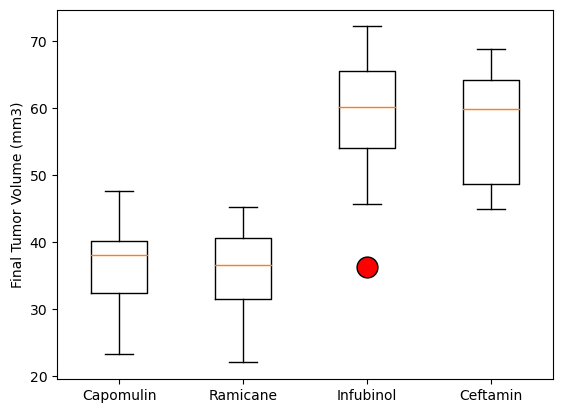

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(final_volume, 0, flierprops={'marker': 'o', 'markersize': 15, 'markerfacecolor': 'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1,2,3,4], drug_columns)

plt.show()


## Line and Scatter Plots

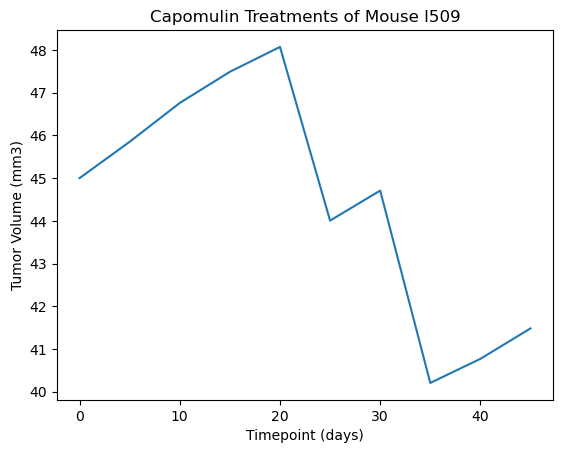

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Enter Mouse ID
mouse_id = "l509"
# Limit results to just. "Capomulin"
capomulin = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]

# Limit columns to only those relevant to chart
single_mouse = capomulin[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Input Mouse ID
single_mouse =single_mouse.loc[single_mouse["Mouse ID"] == mouse_id]

single_mouse = single_mouse.set_index("Mouse ID")

timepoint = single_mouse["Timepoint"]
volume = single_mouse["Tumor Volume (mm3)"]

plt.plot(timepoint, volume)
plt.title("Capomulin Treatments of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

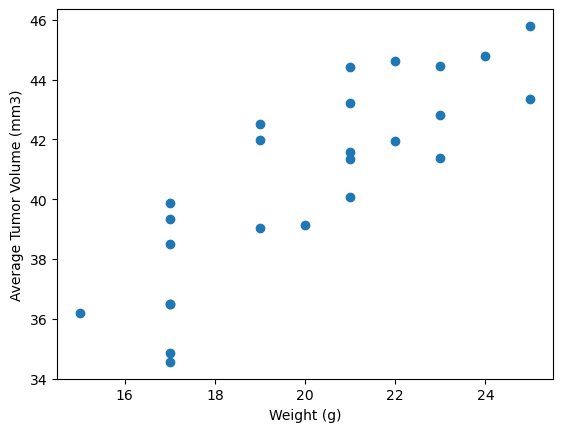

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Determine the average weight and tumor volume for the single drug regimen
ave_volume = capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
ave_weight = capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()

plt.scatter(ave_weight, ave_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()

## Correlation and Regression

The correlation between mouse weight and total tumor volume is 0.84


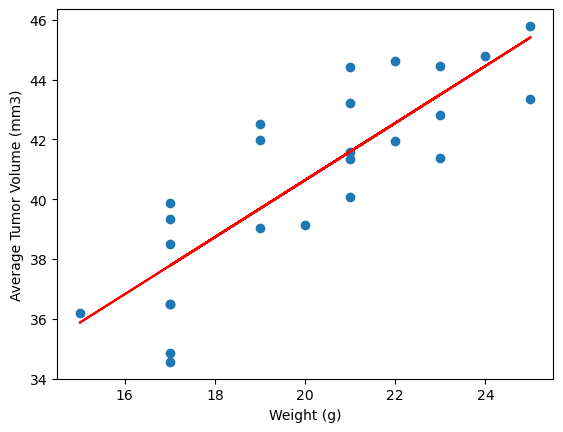

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Correlation
correlation = st.pearsonr(ave_weight,ave_volume)
print(f"The correlation between mouse weight and total tumor volume is {round(correlation[0],2)}")

# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ave_weight, ave_volume)
regress_values = ave_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(ave_weight, ave_volume)
plt.plot(ave_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()